# Exploration du dataset "wine"

## Importation du dataset

In [1]:
!pip install ucimlrepo


[notice] A new release of pip is available: 23.3.1 -> 24.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [3]:
!pip install --upgrade pip

  Using cached pip-24.3.1-py3-none-any.whl.metadata (3.7 kB)
Using cached pip-24.3.1-py3-none-any.whl (1.8 MB)


ERROR: To modify pip, please run the following command:
C:\Users\user\anaconda3\python.exe -m pip install --upgrade pip

[notice] A new release of pip is available: 23.3.1 -> 24.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [22]:
from ucimlrepo import fetch_ucirepo 
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report
from sklearn.metrics import confusion_matrix, roc_auc_score
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.naive_bayes import GaussianNB, MultinomialNB

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [5]:
# fetch dataset 
wine_quality = fetch_ucirepo(id=186) 
  
# data (as pandas dataframes) 
X = wine_quality.data.features 
y = wine_quality.data.targets 
  
# metadata 
print(wine_quality.metadata) 
  
# variable information 
print(wine_quality.variables) 

{'uci_id': 186, 'name': 'Wine Quality', 'repository_url': 'https://archive.ics.uci.edu/dataset/186/wine+quality', 'data_url': 'https://archive.ics.uci.edu/static/public/186/data.csv', 'abstract': 'Two datasets are included, related to red and white vinho verde wine samples, from the north of Portugal. The goal is to model wine quality based on physicochemical tests (see [Cortez et al., 2009], http://www3.dsi.uminho.pt/pcortez/wine/).', 'area': 'Business', 'tasks': ['Classification', 'Regression'], 'characteristics': ['Multivariate'], 'num_instances': 4898, 'num_features': 11, 'feature_types': ['Real'], 'demographics': [], 'target_col': ['quality'], 'index_col': None, 'has_missing_values': 'no', 'missing_values_symbol': None, 'year_of_dataset_creation': 2009, 'last_updated': 'Wed Nov 15 2023', 'dataset_doi': '10.24432/C56S3T', 'creators': ['Paulo Cortez', 'A. Cerdeira', 'F. Almeida', 'T. Matos', 'J. Reis'], 'intro_paper': {'ID': 252, 'type': 'NATIVE', 'title': 'Modeling wine preferences

# Début de l'analyse exploratoire

## Préparation des données

In [6]:
wine_quality = fetch_ucirepo(id=186)

In [7]:
# Features et cible
X = pd.DataFrame(wine_quality.data.features, columns=wine_quality.variables['name'][:-1])
y = wine_quality.data.targets

In [8]:
# Transformation de la cible pour classification binaire (qualité > 6 = bon vin)
y_binary = (y > 6).astype(int)

In [9]:
# Standardisation des features pour certains classifieurs (e.g., SVM, kNN)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

C:\Users\user\anaconda3\Lib\site-packages\sklearn\utils\extmath.py:1050: RuntimeWarning: invalid value encountered in divide
  updated_mean = (last_sum + new_sum) / updated_sample_count
C:\Users\user\anaconda3\Lib\site-packages\sklearn\utils\extmath.py:1055: RuntimeWarning: invalid value encountered in divide
  T = new_sum / new_sample_count
C:\Users\user\anaconda3\Lib\site-packages\sklearn\utils\extmath.py:1075: RuntimeWarning: invalid value encountered in divide
  new_unnormalized_variance -= correction**2 / new_sample_count


In [10]:
print("Vérification des NaN dans les données :")
print(pd.DataFrame(X).isnull().sum())

print("\nVérification des valeurs infinies :")
print(np.isinf(X).sum())

Vérification des NaN dans les données :
name
fixed_acidity              0
volatile_acidity           0
citric_acid                0
residual_sugar             0
chlorides                  0
free_sulfur_dioxide        0
total_sulfur_dioxide       0
density                    0
pH                         0
sulphates                  0
alcohol                    0
quality                 6497
dtype: int64

Vérification des valeurs infinies :
name
fixed_acidity           0
volatile_acidity        0
citric_acid             0
residual_sugar          0
chlorides               0
free_sulfur_dioxide     0
total_sulfur_dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64


In [11]:
print(X.dtypes)

name
fixed_acidity           float64
volatile_acidity        float64
citric_acid             float64
residual_sugar          float64
chlorides               float64
free_sulfur_dioxide     float64
total_sulfur_dioxide    float64
density                 float64
pH                      float64
sulphates               float64
alcohol                 float64
quality                 float64
dtype: object


In [12]:
X = X.drop(columns=["quality"])

In [13]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [14]:
print("Premières lignes après standardisation :")
print(pd.DataFrame(X_scaled, columns=X.columns).head())

Premières lignes après standardisation :
name  fixed_acidity  volatile_acidity  citric_acid  residual_sugar  chlorides  \
0          0.142473          2.188833    -2.192833       -0.744778   0.569958   
1          0.451036          3.282235    -2.192833       -0.597640   1.197975   
2          0.451036          2.553300    -1.917553       -0.660699   1.026697   
3          3.073817         -0.362438     1.661085       -0.744778   0.541412   
4          0.142473          2.188833    -2.192833       -0.744778   0.569958   

name  free_sulfur_dioxide  total_sulfur_dioxide   density        pH  \
0               -1.100140             -1.446359  1.034993  1.813090   
1               -0.311320             -0.862469  0.701486 -0.115073   
2               -0.874763             -1.092486  0.768188  0.258120   
3               -0.762074             -0.986324  1.101694 -0.363868   
4               -1.100140             -1.446359  1.034993  1.813090   

name  sulphates   alcohol  
0      0.193097 -

## Test des modèles de classification

In [15]:
# Diviser les données en ensembles d'entraînement et de test
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y_binary, test_size=0.3, random_state=42)

# Vérifie les formes des ensembles
print(f"X_train shape: {X_train.shape}")
print(f"X_test shape: {X_test.shape}")
print(f"y_train shape: {y_train.shape}")
print(f"y_test shape: {y_test.shape}")

X_train shape: (4547, 11)
X_test shape: (1950, 11)
y_train shape: (4547, 1)
y_test shape: (1950, 1)


In [16]:
# Initialisation des modèles
models = {
    "SVM": SVC(probability=True, random_state=42),
    "Logistic Regression": LogisticRegression(random_state=42),
    "Random Forest": RandomForestClassifier(random_state=42),
    "Gradient Boosting": GradientBoostingClassifier(random_state=42)
}

# Stocker les résultats
results = []

In [17]:
# Test des modèles
for name, model in models.items():
    print(f"--- {name} ---")
    model.fit(X_train, y_train)  # Entraîner le modèle
    y_pred = model.predict(X_test)  # Prédictions
    
    # Évaluation
    accuracy = accuracy_score(y_test, y_pred)
    print(f"Accuracy: {accuracy:.2f}")
    print(classification_report(y_test, y_pred))
    
    # Stockage des résultats
    results.append({"Model": name, "Accuracy": accuracy})

--- SVM ---


C:\Users\user\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Accuracy: 0.84
              precision    recall  f1-score   support

           0       0.85      0.97      0.91      1585
           1       0.66      0.28      0.39       365

    accuracy                           0.84      1950
   macro avg       0.75      0.62      0.65      1950
weighted avg       0.82      0.84      0.81      1950

--- Logistic Regression ---
Accuracy: 0.83
              precision    recall  f1-score   support

           0       0.85      0.95      0.90      1585
           1       0.58      0.27      0.37       365

    accuracy                           0.83      1950
   macro avg       0.71      0.61      0.63      1950
weighted avg       0.80      0.83      0.80      1950

--- Random Forest ---


C:\Users\user\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\user\anaconda3\Lib\site-packages\sklearn\base.py:1152: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


Accuracy: 0.89
              precision    recall  f1-score   support

           0       0.91      0.96      0.93      1585
           1       0.78      0.57      0.66       365

    accuracy                           0.89      1950
   macro avg       0.84      0.76      0.79      1950
weighted avg       0.88      0.89      0.88      1950

--- Gradient Boosting ---


C:\Users\user\anaconda3\Lib\site-packages\sklearn\ensemble\_gb.py:424: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Accuracy: 0.85
              precision    recall  f1-score   support

           0       0.87      0.95      0.91      1585
           1       0.65      0.38      0.48       365

    accuracy                           0.85      1950
   macro avg       0.76      0.67      0.70      1950
weighted avg       0.83      0.85      0.83      1950



Résumé des performances des modèles :
                 Model  Accuracy
2        Random Forest  0.888205
3    Gradient Boosting  0.846154
0                  SVM  0.837436
1  Logistic Regression  0.826154


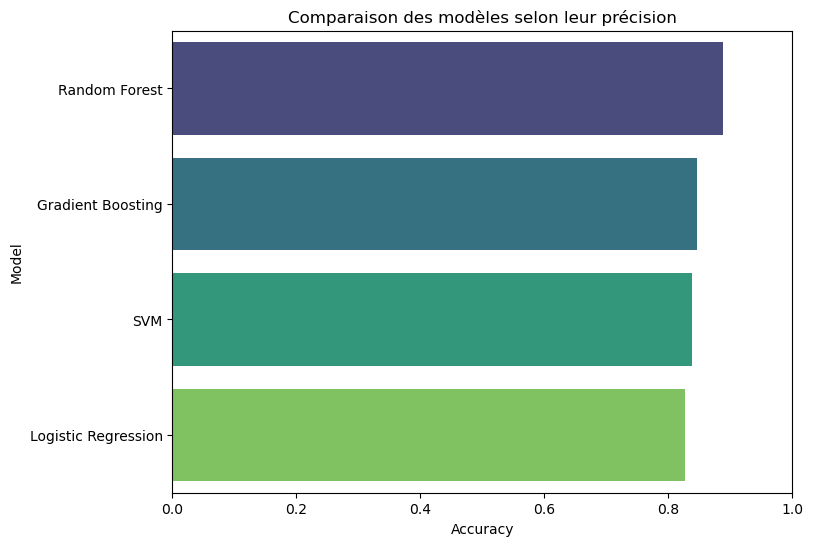

In [18]:
# Résumé des performances
results_df = pd.DataFrame(results).sort_values(by="Accuracy", ascending=False)

# Affichage des résultats sous forme de tableau
print("Résumé des performances des modèles :")
print(results_df)

# Affichage graphique des résultats
plt.figure(figsize=(8, 6))
sns.barplot(x="Accuracy", y="Model", data=results_df, palette="viridis")
plt.title("Comparaison des modèles selon leur précision")
plt.xlabel("Accuracy")
plt.ylabel("Model")
plt.xlim(0, 1)  # Limite entre 0 et 1 pour l'accuracy
plt.savefig("comparaison_modeles_precision.png")  # Sauvegarde
plt.show()

## Nous choisirons donc Random Forest pour la suite de l'exploration de ce dataset

### Réentraînement du modèle

C:\Users\user\anaconda3\Lib\site-packages\sklearn\base.py:1152: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


Accuracy: 0.89
Rapport de classification :
              precision    recall  f1-score   support

           0       0.91      0.96      0.93      1585
           1       0.78      0.57      0.66       365

    accuracy                           0.89      1950
   macro avg       0.84      0.76      0.79      1950
weighted avg       0.88      0.89      0.88      1950



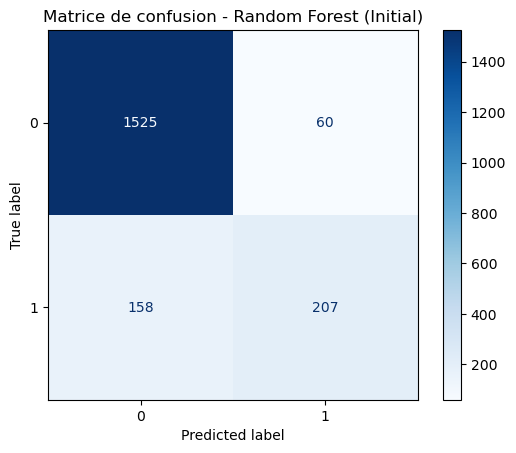

In [23]:
# Initialisation du modèle
rf_model = RandomForestClassifier(random_state=42)

# Entraînement
rf_model.fit(X_train, y_train)

# Prédictions
y_pred = rf_model.predict(X_test)

# Évaluation
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")

# Rapport de classification
print("Rapport de classification :")
print(classification_report(y_test, y_pred))

# Enregistrement des résultats
results_df.to_csv("resultats_modeles_random-forest-initial.csv", index=False)

# Visualisation de la matrice de confusion
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=rf_model.classes_)
disp.plot(cmap="Blues", values_format="d")  # Format des valeurs entières
plt.title("Matrice de confusion - Random Forest (Initial)")
plt.savefig("matrice_confusion_random_forest_initial.png")  # Sauvegarde
plt.show()

### Analyse des importances des caractéristiques

In [25]:
# Récupérer les importances des caractéristiques
feature_importances = pd.DataFrame({
    'Feature': X.columns,
    'Importance': rf_model.feature_importances_
}).sort_values(by='Importance', ascending=False)

# Afficher les importances
print("Importances des caractéristiques :")
print(feature_importances)

Importances des caractéristiques :
                 Feature  Importance
10               alcohol    0.161201
7                density    0.121768
1       volatile_acidity    0.087939
4              chlorides    0.084359
3         residual_sugar    0.084296
9              sulphates    0.083721
6   total_sulfur_dioxide    0.080826
8                     pH    0.079088
5    free_sulfur_dioxide    0.076940
2            citric_acid    0.073389
0          fixed_acidity    0.066473


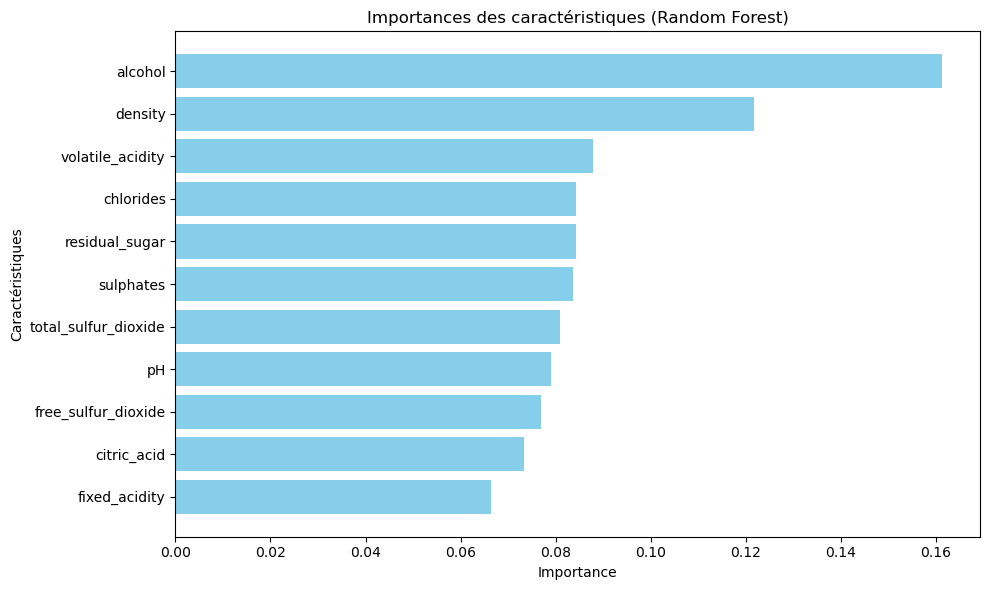

In [31]:
# Visualisation des importances
plt.figure(figsize=(10, 6))
plt.barh(feature_importances['Feature'], feature_importances['Importance'], color="skyblue")
plt.gca().invert_yaxis()
plt.title("Importances des caractéristiques (Random Forest)")
plt.xlabel("Importance")
plt.ylabel("Caractéristiques")
plt.tight_layout()  # Ajuster les marges
plt.savefig("importances_caracteristiques_random_forest_initial.png") 
plt.show()

### Optimisation des hyperparamètres avec GridSearchCV

In [32]:
from sklearn.model_selection import GridSearchCV

In [33]:
# Définir la grille d'hyperparamètres
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# GridSearchCV
grid_search = GridSearchCV(estimator=RandomForestClassifier(random_state=42),
                           param_grid=param_grid,
                           cv=3, scoring='accuracy', verbose=2, n_jobs=-1)

# Recherche des meilleurs paramètres
grid_search.fit(X_train, y_train)

# Meilleurs paramètres
print("Meilleurs paramètres trouvés :", grid_search.best_params_)

# Meilleur modèle
best_rf = grid_search.best_estimator_

# Réévaluation avec les meilleurs paramètres
y_pred_optimized = best_rf.predict(X_test)
optimized_accuracy = accuracy_score(y_test, y_pred_optimized)
print(f"Accuracy après optimisation : {optimized_accuracy:.2f}")

Fitting 3 folds for each of 108 candidates, totalling 324 fits


C:\Users\user\anaconda3\Lib\site-packages\sklearn\base.py:1152: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


Meilleurs paramètres trouvés : {'max_depth': 20, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 100}
Accuracy après optimisation : 0.88


### Vérification de l'équilibre des classes

Distribution des classes dans les données d'entraînement :
Classe 0 : 3635 échantillons
Classe 1 : 912 échantillons


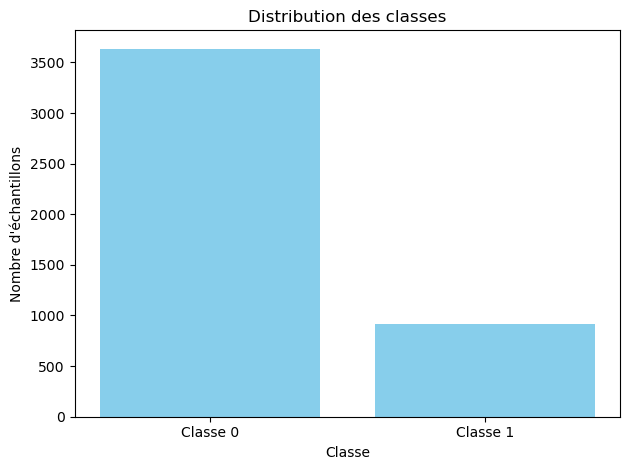

In [34]:
# Vérifier la distribution des classes dans les données d'entraînement
unique, counts = np.unique(y_train, return_counts=True)
class_distribution = dict(zip(unique, counts))

print("Distribution des classes dans les données d'entraînement :")
for cls, count in class_distribution.items():
    print(f"Classe {cls} : {count} échantillons")

# Affichage graphique
import matplotlib.pyplot as plt
plt.bar(["Classe 0", "Classe 1"], [3635, 912], color="skyblue")
plt.title("Distribution des classes")
plt.xlabel("Classe")
plt.ylabel("Nombre d'échantillons")
plt.tight_layout() 
plt.savefig("distribution_classes.png")  
plt.show()

#### On voit donc que les classes sont déséquilibrées, nous allons donc tester en pondérant les classes

In [35]:
# Réentraîner le modèle avec class_weight="balanced"
rf_balanced = RandomForestClassifier(
    n_estimators=100,
    max_depth=20,
    min_samples_split=2,
    min_samples_leaf=1,
    class_weight="balanced",  # Ajuster les poids des classes
    random_state=42
)
rf_balanced.fit(X_train, y_train)

# Prédictions et évaluation
y_pred_balanced = rf_balanced.predict(X_test)

# Évaluer les performances
balanced_accuracy = accuracy_score(y_test, y_pred_balanced)
print(f"Accuracy avec class_weight='balanced': {balanced_accuracy:.2f}")
print(classification_report(y_test, y_pred_balanced))

C:\Users\user\anaconda3\Lib\site-packages\sklearn\base.py:1152: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


Accuracy avec class_weight='balanced': 0.89
              precision    recall  f1-score   support

           0       0.91      0.96      0.93      1585
           1       0.77      0.57      0.66       365

    accuracy                           0.89      1950
   macro avg       0.84      0.77      0.80      1950
weighted avg       0.88      0.89      0.88      1950



### Analyse de l'importance des caractéristiques avec les paramètres optimaux et les classes équilibrées

C:\Users\user\anaconda3\Lib\site-packages\sklearn\base.py:1152: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


Accuracy avec paramètres optimisés et class_weight='balanced': 0.89
Rapport de classification :
              precision    recall  f1-score   support

           0       0.91      0.96      0.93      1585
           1       0.77      0.57      0.66       365

    accuracy                           0.89      1950
   macro avg       0.84      0.77      0.80      1950
weighted avg       0.88      0.89      0.88      1950

Matrice de confusion :
[[1524   61]
 [ 156  209]]


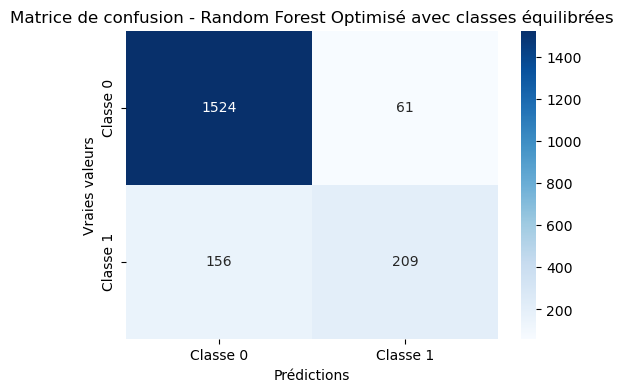

In [38]:
# Modèle avec les meilleurs paramètres et classes équilibrées
rf_optimized_balanced = RandomForestClassifier(
    max_depth=20,
    min_samples_leaf=1,
    min_samples_split=2,
    n_estimators=100,
    class_weight="balanced",
    random_state=42
)

# Entraîner le modèle
rf_optimized_balanced.fit(X_train, y_train)

# Prédictions sur l'ensemble de test
y_pred_optimized_balanced = rf_optimized_balanced.predict(X_test)

# Évaluation
accuracy_optimized_balanced = accuracy_score(y_test, y_pred_optimized_balanced)
print(f"Accuracy avec paramètres optimisés et class_weight='balanced': {accuracy_optimized_balanced:.2f}")
print("Rapport de classification :")
print(classification_report(y_test, y_pred_optimized_balanced))

# Enregistrement du rapport de classification
with open("rapport_classification_optimized.txt", "w") as f:
    f.write(classification_report(y_test, y_pred_optimized_balanced))

# Matrice de confusion
cm_optimized_balanced = confusion_matrix(y_test, y_pred_optimized_balanced)
print("Matrice de confusion :")
print(cm_optimized_balanced)

# Visualisation de la matrice de confusion
plt.figure(figsize=(6, 4))
sns.heatmap(cm_optimized_balanced, annot=True, fmt="d", cmap="Blues", xticklabels=["Classe 0", "Classe 1"], yticklabels=["Classe 0", "Classe 1"])
plt.title("Matrice de confusion - Random Forest Optimisé avec classes équilibrées")
plt.xlabel("Prédictions")
plt.ylabel("Vraies valeurs")
plt.savefig("matrice_confusion_random_forest_optimized.png") 
plt.show()

Importances des caractéristiques avec le modèle optimisé :
                 Feature  Importance
10               alcohol    0.188318
7                density    0.125707
1       volatile_acidity    0.094207
4              chlorides    0.086415
6   total_sulfur_dioxide    0.079229
2            citric_acid    0.078157
3         residual_sugar    0.077334
8                     pH    0.070000
9              sulphates    0.069068
5    free_sulfur_dioxide    0.067726
0          fixed_acidity    0.063839


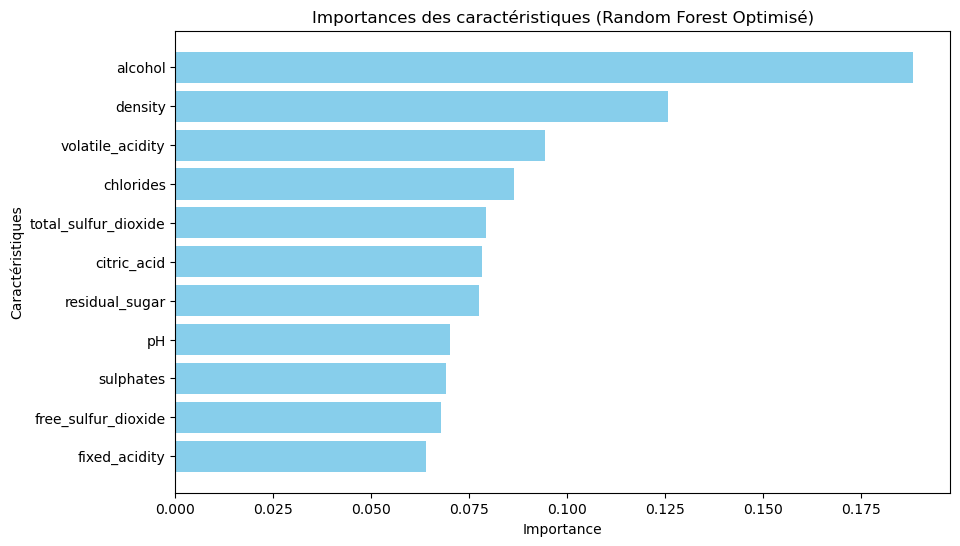

In [39]:
# Importances des caractéristiques
feature_importances_optimized = pd.DataFrame({
    'Feature': X.columns,
    'Importance': rf_optimized_balanced.feature_importances_
}).sort_values(by='Importance', ascending=False)

# Affichage des importances
print("Importances des caractéristiques avec le modèle optimisé :")
print(feature_importances_optimized)

# Enregistrement des importances dans un fichier CSV
feature_importances_optimized.to_csv("importances_caracteristiques_optimized.csv", index=False)

# Visualisation des importances
plt.figure(figsize=(10, 6))
plt.barh(feature_importances_optimized['Feature'], feature_importances_optimized['Importance'], color="skyblue")
plt.gca().invert_yaxis()
plt.title("Importances des caractéristiques (Random Forest Optimisé)")
plt.xlabel("Importance")
plt.ylabel("Caractéristiques")
plt.savefig("importances_caracteristiques_random_forest_optimized.png") 
plt.show()

## Suite aux conseils de Mme BenChaabene, utilisations de Naïve Bayes

In [40]:
# Initialisation des modèles
gnb = GaussianNB()
mnb = MultinomialNB()

# Entraîner Gaussian Naïve Bayes
gnb.fit(X_train, y_train)
y_pred_gnb = gnb.predict(X_test)

# Entraîner Multinomial Naïve Bayes (note : les valeurs doivent être positives pour MultinomialNB)
mnb.fit(X_train - X_train.min(), y_train)  # Décale les valeurs pour qu'elles soient positives
y_pred_mnb = mnb.predict(X_test - X_train.min())

# Évaluation Gaussian Naïve Bayes
accuracy_gnb = accuracy_score(y_test, y_pred_gnb)
print(f"Accuracy avec Gaussian Naïve Bayes : {accuracy_gnb:.2f}")
print("Rapport de classification Gaussian Naïve Bayes :")
print(classification_report(y_test, y_pred_gnb))

# Évaluation Multinomial Naïve Bayes
accuracy_mnb = accuracy_score(y_test, y_pred_mnb)
print(f"Accuracy avec Multinomial Naïve Bayes : {accuracy_mnb:.2f}")
print("Rapport de classification Multinomial Naïve Bayes :")
print(classification_report(y_test, y_pred_mnb))

Accuracy avec Gaussian Naïve Bayes : 0.76
Rapport de classification Gaussian Naïve Bayes :
              precision    recall  f1-score   support

           0       0.90      0.79      0.84      1585
           1       0.41      0.62      0.49       365

    accuracy                           0.76      1950
   macro avg       0.66      0.71      0.67      1950
weighted avg       0.81      0.76      0.78      1950

Accuracy avec Multinomial Naïve Bayes : 0.81
Rapport de classification Multinomial Naïve Bayes :
              precision    recall  f1-score   support

           0       0.81      1.00      0.90      1585
           1       1.00      0.00      0.01       365

    accuracy                           0.81      1950
   macro avg       0.91      0.50      0.45      1950
weighted avg       0.85      0.81      0.73      1950



C:\Users\user\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\user\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


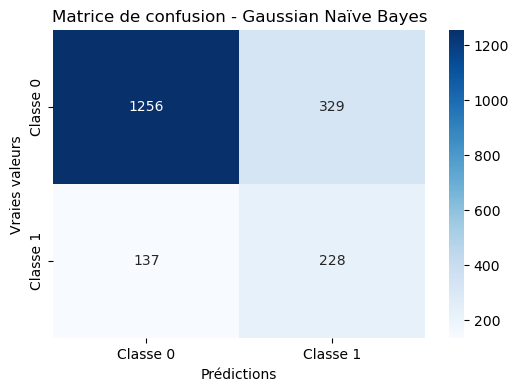

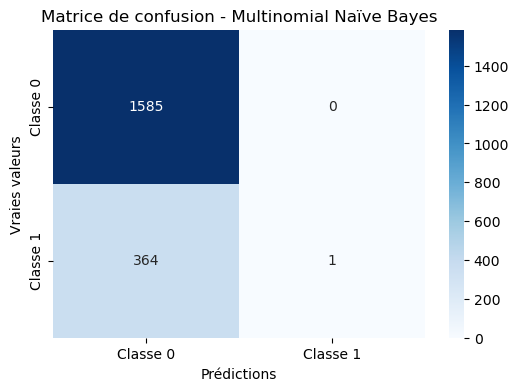

In [41]:
# Matrice de confusion pour GaussianNB
cm_gnb = confusion_matrix(y_test, y_pred_gnb)
plt.figure(figsize=(6, 4))
sns.heatmap(cm_gnb, annot=True, fmt="d", cmap="Blues", xticklabels=["Classe 0", "Classe 1"], yticklabels=["Classe 0", "Classe 1"])
plt.title("Matrice de confusion - Gaussian Naïve Bayes")
plt.xlabel("Prédictions")
plt.ylabel("Vraies valeurs")
plt.savefig("matrice_confusion_gaussian_nb.png") 
plt.show()

# Matrice de confusion pour MultinomialNB
cm_mnb = confusion_matrix(y_test, y_pred_mnb)
plt.figure(figsize=(6, 4))
sns.heatmap(cm_mnb, annot=True, fmt="d", cmap="Blues", xticklabels=["Classe 0", "Classe 1"], yticklabels=["Classe 0", "Classe 1"])
plt.title("Matrice de confusion - Multinomial Naïve Bayes")
plt.xlabel("Prédictions")
plt.ylabel("Vraies valeurs")
plt.savefig("matrice_confusion_multinomial_nb.png") 
plt.show()

Comparaison des performances :
                    Modèle  Accuracy
0            Random Forest  0.888718
1     Gaussian Naïve Bayes  0.761026
2  Multinomial Naïve Bayes  0.813333


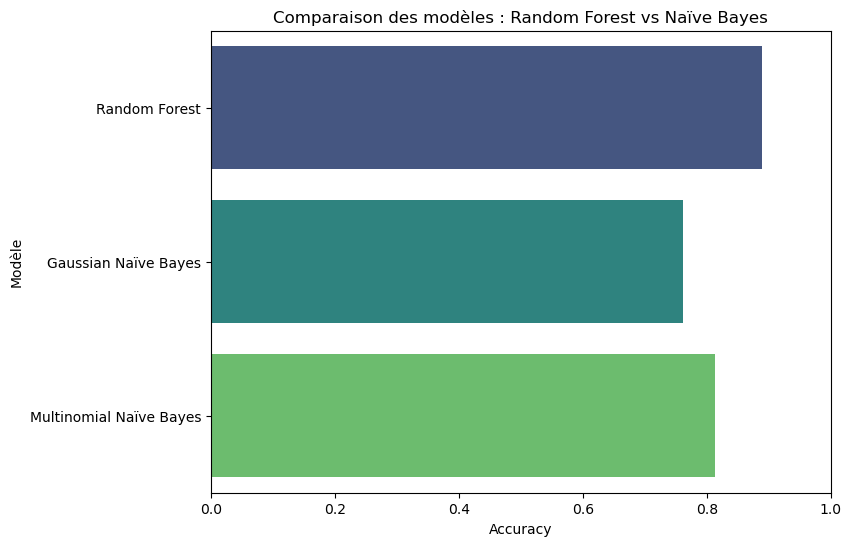

In [43]:
# Comparaison des résultats
results_comparison = pd.DataFrame({
    "Modèle": ["Random Forest", "Gaussian Naïve Bayes", "Multinomial Naïve Bayes"],
    "Accuracy": [accuracy_optimized_balanced, accuracy_gnb, accuracy_mnb]
})

print("Comparaison des performances :")
print(results_comparison)

# Enregistrement du tableau des performances
results_comparison.to_csv("comparaison_performances_Naïve-Random.csv", index=False)

# Visualisation des performances
plt.figure(figsize=(8, 6))
sns.barplot(x="Accuracy", y="Modèle", data=results_comparison, palette="viridis")
plt.title("Comparaison des modèles : Random Forest vs Naïve Bayes")
plt.xlabel("Accuracy")
plt.ylabel("Modèle")
plt.xlim(0, 1)  # Limite entre 0 et 1 pour l'accuracy
plt.savefig("comparaison_performances_Naïve-Random.png")
plt.show()

## Random Forest reste le classifieur le plus optimal, utilisons des poids sur des caractéristiques

In [44]:
# Copie des données pour éviter de modifier l'original
X_weighted = X_scaled.copy()

# Appliquer les pondérations
X_weighted[:, X.columns.get_loc('alcohol')] *= 0.5  # Réduction de l'importance
X_weighted[:, X.columns.get_loc('volatile_acidity')] *= 1.5  # Augmentation de l'importance
X_weighted[:, X.columns.get_loc('residual_sugar')] *= 1.5  # Augmentation de l'importance
X_weighted[:, X.columns.get_loc('pH')] *= 1.5  # Augmentation de l'importance
X_weighted[:, X.columns.get_loc('density')] *= 1.5  # Augmentation de l'importance

In [45]:
# Diviser les données pondérées
X_train_weighted, X_test_weighted, y_train, y_test = train_test_split(X_weighted, y, test_size=0.2, random_state=42)

C:\Users\user\anaconda3\Lib\site-packages\sklearn\base.py:1152: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


Accuracy avec pondérations : 0.67
Matrice de confusion avec pondérations :
[[  0   0   2   4   0   0   0]
 [  1   5  24  13   0   0   0]
 [  0   1 287 111   3   0   0]
 [  0   1 112 448  36   0   0]
 [  0   0   2  93 119   1   0]
 [  0   0   0  15   9  12   0]
 [  0   0   0   0   1   0   0]]


C:\Users\user\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\user\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\user\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


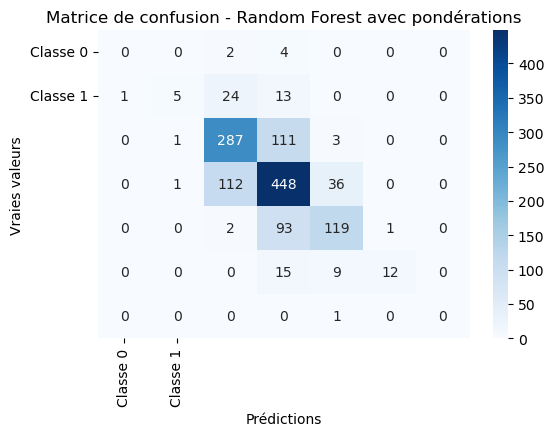

In [47]:
# Modèle avec pondérations
rf_weighted = RandomForestClassifier(random_state=42)

# Entraînement
rf_weighted.fit(X_train_weighted, y_train)

# Prédictions
y_pred_weighted = rf_weighted.predict(X_test_weighted)

# Accuracy et rapport de classification
accuracy_weighted = accuracy_score(y_test, y_pred_weighted)
print(f"Accuracy avec pondérations : {accuracy_weighted:.2f}")

# Sauvegarder rapport de classification
with open("rapport_classification_pondere.txt", "w") as f:
    f.write(classification_report(y_test, y_pred_weighted))

# Matrice de confusion
cm_weighted = confusion_matrix(y_test, y_pred_weighted)
print("Matrice de confusion avec pondérations :")
print(cm_weighted)

# Visualisation et sauvegarde de la matrice de confusion
plt.figure(figsize=(6, 4))
sns.heatmap(cm_weighted, annot=True, fmt="d", cmap="Blues", xticklabels=["Classe 0", "Classe 1"], yticklabels=["Classe 0", "Classe 1"])
plt.title("Matrice de confusion - Random Forest avec pondérations")
plt.xlabel("Prédictions")
plt.ylabel("Vraies valeurs")
plt.savefig("matrice_confusion_pondere.png")
plt.show()

                 Feature  Importance
10               alcohol    0.127505
7                density    0.101572
1       volatile_acidity    0.101315
6   total_sulfur_dioxide    0.090510
4              chlorides    0.087159
5    free_sulfur_dioxide    0.086192
9              sulphates    0.086121
8                     pH    0.085332
3         residual_sugar    0.082760
2            citric_acid    0.077995
0          fixed_acidity    0.073540


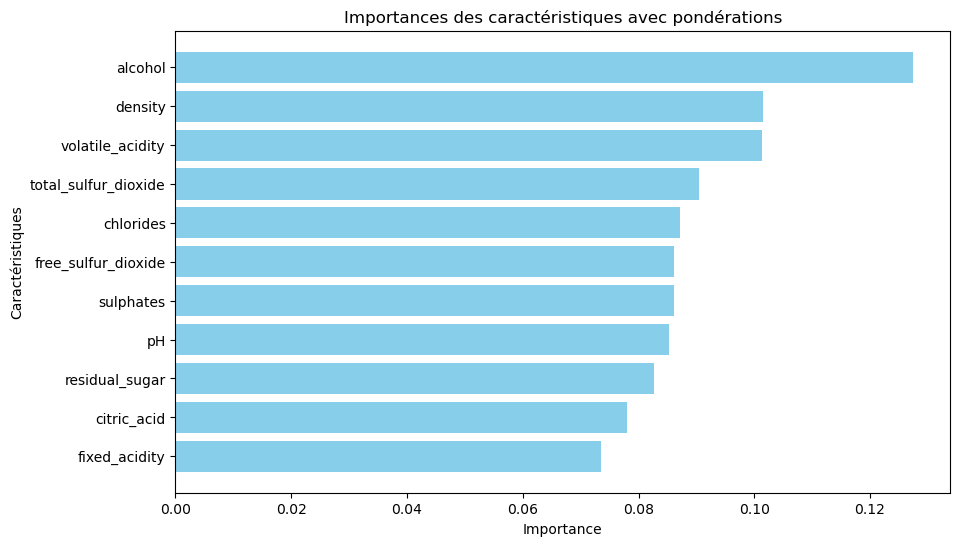

In [48]:
# Importances des caractéristiques
feature_importances_weighted = pd.DataFrame({
    'Feature': X.columns,
    'Importance': rf_weighted.feature_importances_
}).sort_values(by='Importance', ascending=False)

# Affichage et sauvegarde
print(feature_importances_weighted)
feature_importances_weighted.to_csv("importances_caracteristiques_ponderees.csv", index=False)

# Graphique des importances
plt.figure(figsize=(10, 6))
plt.barh(feature_importances_weighted['Feature'], feature_importances_weighted['Importance'], color="skyblue")
plt.gca().invert_yaxis()
plt.title("Importances des caractéristiques avec pondérations")
plt.xlabel("Importance")
plt.ylabel("Caractéristiques")
plt.savefig("importances_caracteristiques_ponderees.png")
plt.show()

C:\Users\user\AppData\Local\Temp\ipykernel_20056\3094052618.py:2: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_comparison = results_comparison.append({


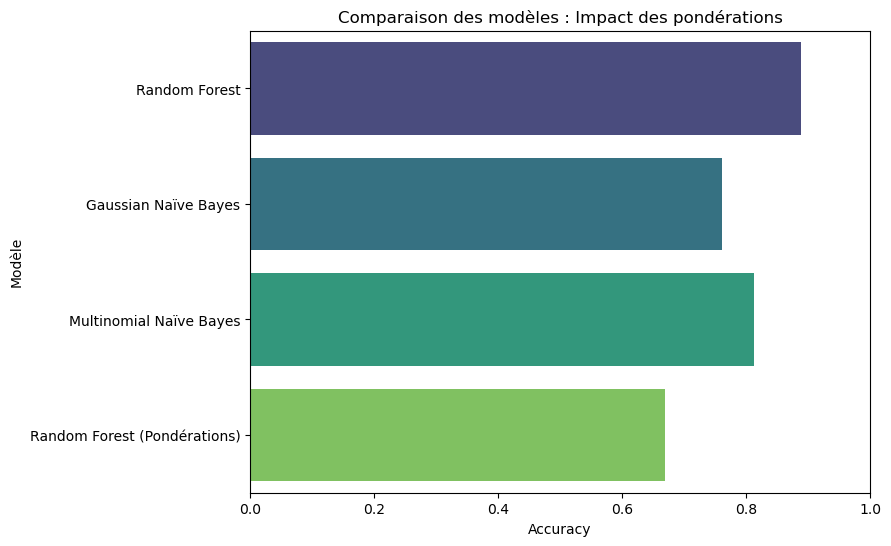

In [49]:
# Ajouter les résultats pondérés à la comparaison
results_comparison = results_comparison.append({
    "Modèle": "Random Forest (Pondérations)",
    "Accuracy": accuracy_weighted
}, ignore_index=True)

# Sauvegarder les résultats
results_comparison.to_csv("comparaison_performances_tous_modeles.csv", index=False)

# Graphique de comparaison
plt.figure(figsize=(8, 6))
sns.barplot(x="Accuracy", y="Modèle", data=results_comparison, palette="viridis")
plt.title("Comparaison des modèles : Impact des pondérations")
plt.xlabel("Accuracy")
plt.ylabel("Modèle")
plt.xlim(0, 1)
plt.savefig("comparaison_performances_tous_modeles.png")
plt.show()

### Second test avec d'autres pondérations

In [52]:
params_optimised = grid_search.best_params_

C:\Users\user\anaconda3\Lib\site-packages\sklearn\base.py:1152: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


Accuracy avec pondérations légères : 0.68
Rapport de classification avec pondérations légères :
              precision    recall  f1-score   support

           3       0.00      0.00      0.00         6
           4       0.62      0.12      0.20        43
           5       0.68      0.74      0.71       402
           6       0.67      0.76      0.71       597
           7       0.73      0.56      0.64       215
           8       0.86      0.33      0.48        36
           9       0.00      0.00      0.00         1

    accuracy                           0.68      1300
   macro avg       0.51      0.36      0.39      1300
weighted avg       0.68      0.68      0.67      1300

Matrice de confusion avec pondérations légères :
[[  0   0   2   4   0   0   0]
 [  1   5  23  14   0   0   0]
 [  0   2 299  98   3   0   0]
 [  0   1 115 451  29   1   0]
 [  0   0   2  91 121   1   0]
 [  0   0   0  13  11  12   0]
 [  0   0   0   0   1   0   0]]


C:\Users\user\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\user\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\user\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


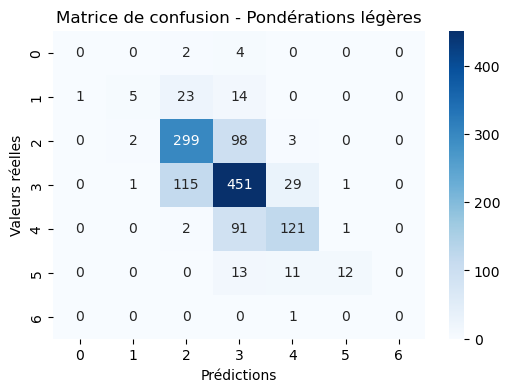

In [53]:
# Appliquer des pondérations modérées
X_weighted = X_scaled.copy()
X_weighted[:, X.columns.get_loc('alcohol')] *= 0.8
X_weighted[:, X.columns.get_loc('volatile_acidity')] *= 1.2
X_weighted[:, X.columns.get_loc('residual_sugar')] *= 1.2
X_weighted[:, X.columns.get_loc('pH')] *= 1.2

# Division en ensembles d'entraînement et de test
X_train_weighted, X_test_weighted, y_train_weighted, y_test_weighted = train_test_split(
    X_weighted, y, test_size=0.2, random_state=42
)

# Entraîner le modèle
rf_weighted = RandomForestClassifier(random_state=42, **params_optimised)
rf_weighted.fit(X_train_weighted, y_train_weighted)

# Évaluation
y_pred_weighted = rf_weighted.predict(X_test_weighted)
accuracy_weighted = accuracy_score(y_test_weighted, y_pred_weighted)
print(f"Accuracy avec pondérations légères : {accuracy_weighted:.2f}")

# Rapport de classification et matrice de confusion
print("Rapport de classification avec pondérations légères :")
print(classification_report(y_test_weighted, y_pred_weighted))

cm_weighted = confusion_matrix(y_test_weighted, y_pred_weighted)
print("Matrice de confusion avec pondérations légères :")
print(cm_weighted)

# Sauvegarde des résultats
plt.figure(figsize=(6, 4))
sns.heatmap(cm_weighted, annot=True, fmt="d", cmap="Blues")
plt.title("Matrice de confusion - Pondérations légères")
plt.xlabel("Prédictions")
plt.ylabel("Valeurs réelles")
plt.savefig("matrice_confusion_pondere_legere.png")
plt.show()